## Creating a marketing campaign for a supermarket using machine learning

This project was developed as part of a three hour hackathon with the focus of experimenting with neural networks  and optimisation methods. MLP Classifiers were created using both the sklearn and keras libraries, and GridSearchCV is utilised for hyperparameter optimisation. The time-pressure involved in the hackathon meant that understanding runtime drivers was particularly important. Although none of the models are perfect, it was an excellent experience and good exersize in thinking critically about what elements are crucial when developing machine learning models. <br>
<br>

<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

A supermarket is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases for only 499, which is 999 on other days. It will be valid only for existing customers, and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

<u>Content</u>

The columns included in the dataset are:

<ol>
<li>id - Unique client identifier </li>  
<li>Response <b>(target)</b> - 1 if customer accepted the offer in the last campaign, 0 otherwise </li>
<li>Year_Birth - Age of the customer</li>
<li>Complain - 1 if the customer complained in the last 2 years</li>
<li>Dt_Customer - date of customer's enrollment with the company</li>
<li>Education - customer's level of education</li>
<li>Marital - customer's marital status</li>
<li>Kidhome - number of small children in customer's household</li>
<li>Teenhome - number of teenagers in customer's household</li>
<li>Income - customer's yearly household income</li>
<li>MntFishProducts - the amount spent on fish products in the last 2 years</li>
<li>MntMeatProducts - the amount spent on meat products in the last 2 years</li>
<li>MntFruits - the amount spent on fruits products in the last 2 years</li>
<li>MntSweetProducts - amount spent on sweet products in the last 2 years</li>
<li>MntWines - the amount spent on wine products in the last 2 years</li>
<li>MntGoldProds - the amount spent on gold products in the last 2 years</li>
<li>NumDealsPurchases - number of purchases made with discount</li>
<li>NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)</li>
<li>NumStorePurchases - number of purchases made directly in stores</li>
<li>NumWebPurchases - number of purchases made through the company's website</li>
<li>NumWebVisitsMonth - number of visits to company's website in the last month</li>
<li>Recency - number of days since the last purchase</li>
</ol>


 <u>Inspiration</u>

The supermarket wants to predict the likelihood of the customer giving a positive response identifying the different factors which affect the customer's answer. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of getting positive responses.
    
</div>

#### Approach Taken:

1) Import all libraries <br>
2) Load and investigate data <br>
3) Initial feature selection <br>
4) Investigate missing values <br>
5) Investigate multicollinearity <br>
6) Examine distribution <br>
7) Create training and test split <br>
8) Create preprocessing pipelines <br>
9) Create baseline model using SKLearn <br>
10) Evaluate baseline model performance <br>
11) Optimise baseline model using GridSearchCV <br>
12) Create additional model using Keras library <br>
13) Optimise Keras model using GridSearchCV <br>
14) Final evaluation

#### 1) Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from itertools import product
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam, SGD, Nadam

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")

2023-02-27 23:26:58.995976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 2) Load and investigate data

In [2]:
df = pd.read_csv("supermarket_hackathon.csv", sep = ",")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(2240, 22)

#### 3) Initial Feature Selection

Initial feature selection was performed as not all features are relevant to the business case such as 'Id'. Furthermore, the year of birth and date the customer joined will be transformed to maximize the information gained from the variables (age was determined to give more insights than year of birth, and the number of months spent as a customer was determined to be more valuable than the date the customer joined).

In [4]:
df.columns.tolist()

['Id',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain']

In [5]:
# Drop Id because it is not relevant to our analysis and will prevent generalizability
df = df.drop(columns = ["Id"])

In [6]:
# Convert Dt_Customer to datetime object and then calculate total time of customer enrollment

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['months_spent'] = (datetime.datetime.now().year - df['Dt_Customer'].dt.year) * 12 + (datetime.datetime.now().month - df['Dt_Customer'].dt.month)
df = df.drop(columns = ["Dt_Customer"])
#df.head(15)

In [7]:
# calculate the age of each customer in years because the birthyear has no value for us

df['Age'] = datetime.datetime.now().year - df['Year_Birth']
df = df.drop(columns = ["Year_Birth"])

#### 4) Investigate missing values

In [8]:
df.isna().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
months_spent            0
Age                     0
dtype: int64

Only the variable 'income' has 24 missing values. These will be dealt with in the pipeline using an imputer.

#### 5) Investigate multicollinearity

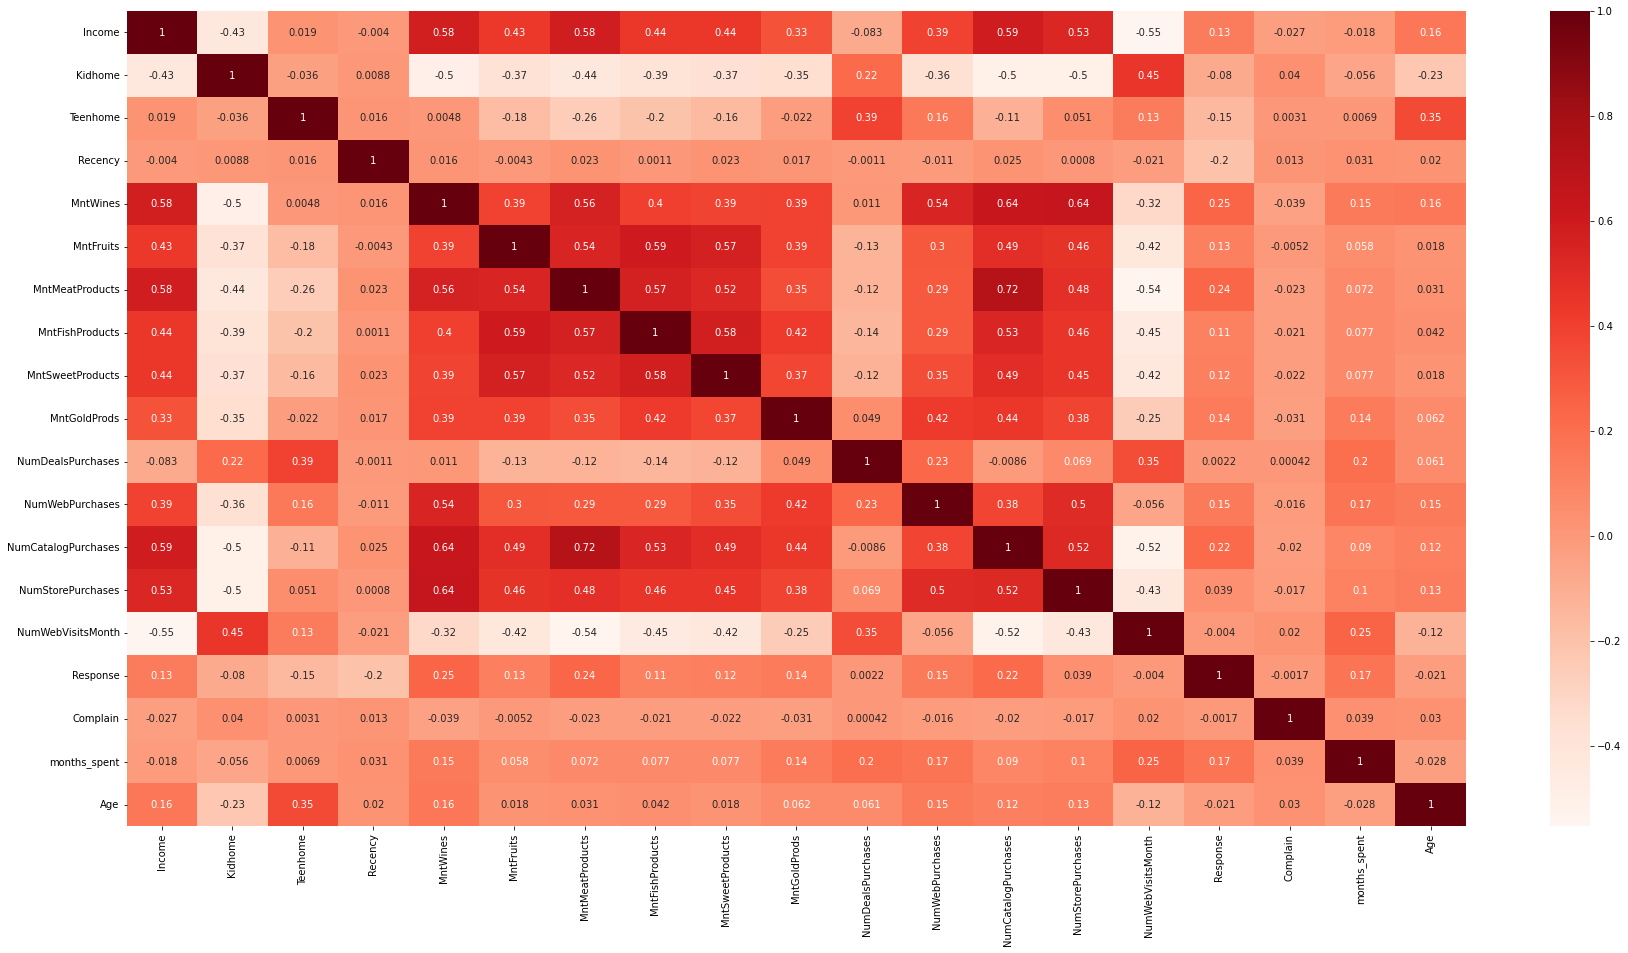

In [9]:
# look at correlation
corr = df.corr()
plt.figure(figsize = (30,15))
sns.heatmap(corr, annot = True, cmap = plt.cm.Reds)
plt.show()

Pairs of highly correlated variables (coefficient of >0.8) are identified and the variable with the lower correlation to the target variable is dropped in order to avoid multicollinearity issues.

In [10]:
# Create a list to store the columns to be dropped
columns_to_drop = []

# Calculate the pairwise correlation matrix
corr_matrix = df.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_2 = upper.drop(columns = ["Response"])
upper_3 = upper_2.drop(index = ["Response"])

# Identify the pairs of highly correlated variables (> 0.8)
correlated_pairs = []
for column in upper_3:
    for index in upper_3.index:
        if column != index and abs(upper_3[column][index]) > 0.8:
            correlated_pairs.append((column, index))

# Iterate over the correlated pairs and drop the variable with the lower correlation with the target variable
for pair in correlated_pairs:
    var1, var2 = pair
    if abs(upper[var1]['Response']) > abs(upper[var2]['Response']):
        columns_to_drop.append(var2)
    else:
        columns_to_drop.append(var1)
        
# Drop the columns from the dataframe
df = df.drop(columns_to_drop, axis=1)

#### 6) Examine Distribution

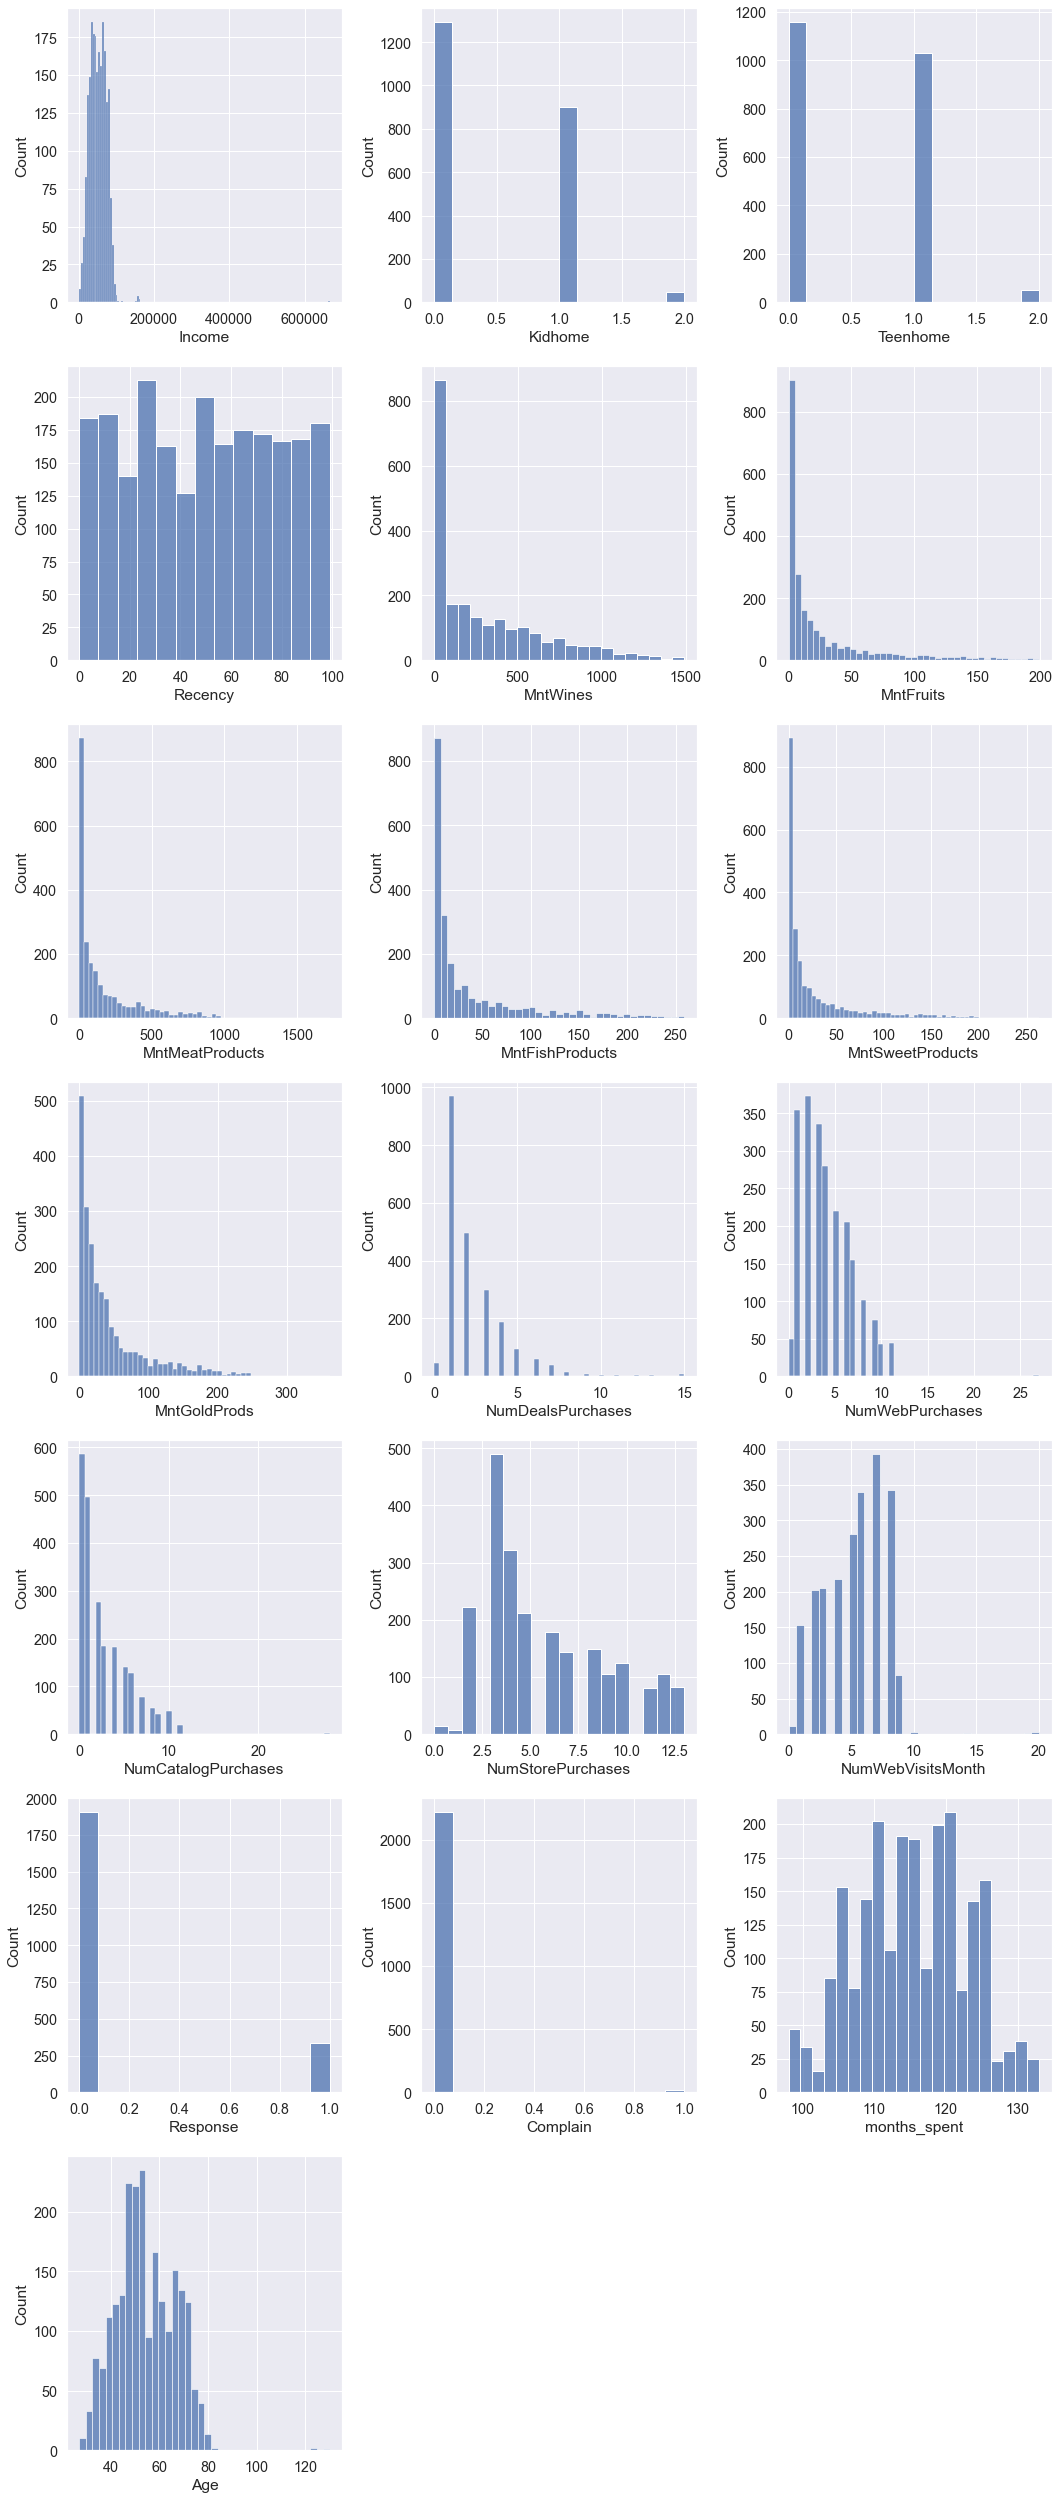

In [11]:
# Explore distribution
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

cols = 3
rows = 7
numerical_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(numerical_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

#### 7) Create Training and Test Split

In [12]:
X = df.drop(columns = ["Response"])
y = df["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

#### 8) Create preprocessing pipelines

When setting up our preprocessing different treatments for categorical and numerical variables were chosen. Categorical variables were one hot encoded, while the numerical variables were treated with a simple imputer. Imputation with the mean was used to preserve the distribution. All features were scaled.

In [13]:
# Define the column transformer for all categorical and numerical variables
categorical_cols = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']
numerical_cols = [i for i, col in enumerate(X.columns) if X[col].dtype != 'object']

# preprocessing pipeline for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessing pipeline for numerical variables
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

# combine them in transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)], remainder='passthrough')

#### 9) Create Baseline Model

An initial MLP Classifier was created using the Scikit-learn library to consider for a baseline

In [14]:
# Baseline pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('scaler', StandardScaler(with_mean=False)),
                       ('model', MLPClassifier(max_iter=2000, random_state=16))])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', MLPClassifier(max_iter=2000, random_state=16))])

#### 10) Evaluate baseline model performance

In [15]:
# Baseline Model performance
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
baseline_sklearn = pipe.score(X_test, y_test)
baseline_sklearn

0.8589285714285714

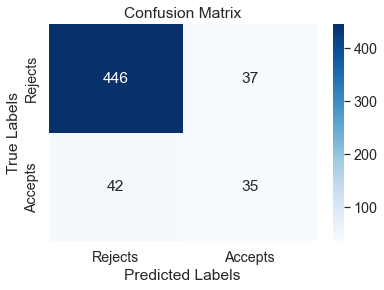

In [16]:
class_names = ["Rejects", "Accepts"]
cm = confusion_matrix(y_test, y_pred,labels= [0, 1])

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)

# add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# display the plot
plt.show()

#### 11) Optimise Baseline Model Using GridSearchCV

In [17]:
warnings.filterwarnings("ignore")

# define a dictionary of hyperparameters to search over, including the solver parameter
parameters = {
    'model__solver': ['adam', 'sgd'],
    'model__hidden_layer_sizes': [(10,), (15,), (20,)],
    'model__activation': ['relu', 'sigmoid', 'logistic'],
    'model__learning_rate': ['constant', 'adaptive'],
    'model__alpha': [0.001, 0.01],
    'model__random_state': [16]
}

# perform a grid search over the hyperparameters to find the best parameters

clf = GridSearchCV(pipe, parameters, n_jobs=-2, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/hannahleslie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hannahleslie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hannahleslie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hannahleslie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warning

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         [2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [0,
                                                                          1])])),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('model',
                                        MLPClassifier(max_iter=2000,
                                                      random_state=16))]),
             n_jobs=-2,
             param_grid={'model__activation': ['relu', 'sigmoid', 'logistic'],
                         'model__alpha': [0.001, 0.01],
                         'model__hidden_layer_sizes': [(10,), (15,), (20,)],
                         'model__learning_rate': ['constant', 'adaptive'],
                         'model__random_state': [16],
                         'model__solver': ['adam', 'sgd']},
             verbose=1)

Best parameters found:
{'model__activation': 'logistic', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (10,), 'model__learning_rate': 'constant', 'model__random_state': 16, 'model__solver': 'adam'}

Train accuracy: 0.9160714285714285
Test accuracy: 0.8839285714285714


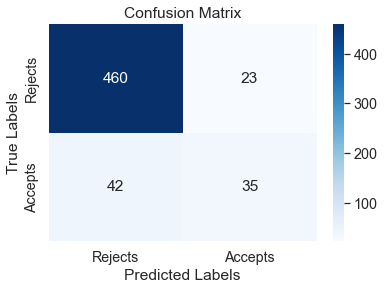

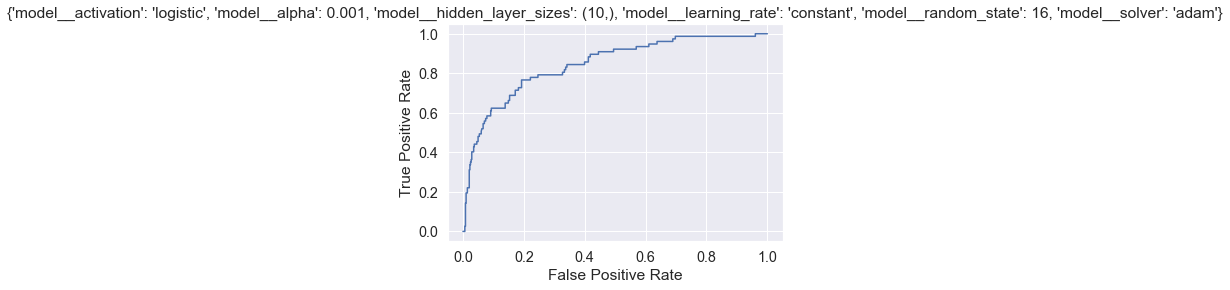

In [18]:
# print the best parameters
print("Best parameters found:")
bestparams = clf.best_params_
print(bestparams)

# evaluate the performance of the model on the test set
y_pred = clf.predict(X_test)
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
optimised_sklearn = test_accuracy
print('\nTrain accuracy: ' + str(train_accuracy) + '\nTest accuracy: ' + str(test_accuracy))

# generate a confusion matrix and classification report
class_names = ["Rejects", "Accepts"]
cm = confusion_matrix(y_test, y_pred,labels= [0, 1])

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)

# add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# display the plot
plt.show()

# generate an ROC curve
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(str(bestparams))
plt.show()

#### 12) Create additional model through Keras Library

In [19]:
# Apply the preprocessor to X
X_train = np.array(preprocessor.fit_transform(X_train))
X_test = np.array(preprocessor.transform(X_test))

# normalize values in X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Since it is a binary classification problem, Sigmoid is used as an activation function for the last layer and only 1 node. The model is compiled using binary_crossentropy. The other parameters are subject to optimization.

In [20]:
# define the necessary model function to use Keras model
def baseline_model(unit):
    model = Sequential()
    model.add(Dense(units=unit, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# assemble the base model
model = baseline_model(unit=8)

# train the model on the training set
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)

# evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# perform k-fold cross-validation on the training set
estimator = KerasClassifier(build_fn=baseline_model, unit=8, epochs=50, batch_size=5, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

baseline_keras = test_accuracy

#print results
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print("CV Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

2023-02-27 23:34:04.350803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
269/269 [==============================] - 2s 2ms/step - loss: 0.7265 - accuracy: 0.5841
Epoch 2/50
269/269 [==============================] - 1s 3ms/step - loss: 0.4825 - accuracy: 0.7999
Epoch 3/50
269/269 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8333
Epoch 4/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8356
Epoch 5/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3779 - accuracy: 0.8408
Epoch 6/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.8423
Epoch 7/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8438
Epoch 8/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8452
Epoch 9/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8467
Epoch 10/50
269/269 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8475

269/269 [==============================] - 1s 2ms/step - loss: 0.2570 - accuracy: 0.8891
Epoch 32/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2569 - accuracy: 0.8921
Epoch 33/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2553 - accuracy: 0.8876
Epoch 34/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2547 - accuracy: 0.8906
Epoch 35/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.8951
Epoch 36/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.8936
Epoch 37/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.8958
Epoch 38/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.8988
Epoch 39/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2503 - accuracy: 0.8973
Epoch 40/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2494 - accuracy: 0.8973
Ep

269/269 [==============================] - 1s 2ms/step - loss: 0.2956 - accuracy: 0.8713
Epoch 11/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.8698
Epoch 12/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.8735
Epoch 13/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2839 - accuracy: 0.8765
Epoch 14/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2811 - accuracy: 0.8757
Epoch 15/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.8780
Epoch 16/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.8787
Epoch 17/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2751 - accuracy: 0.8780
Epoch 18/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8817
Epoch 19/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.8839
Ep

269/269 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.8973
Epoch 41/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2342 - accuracy: 0.8958
Epoch 42/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2331 - accuracy: 0.8951
Epoch 43/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.8921
Epoch 44/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2319 - accuracy: 0.8966
Epoch 45/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2299 - accuracy: 0.8973
Epoch 46/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.8973
Epoch 47/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2292 - accuracy: 0.8943
Epoch 48/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2264 - accuracy: 0.8988
Epoch 49/50
269/269 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9025
Ep

#### 13) Optimise Keras model using GridSearchCV

In [21]:
# define function to create the MLP model
def create_model(layers=[8, 1], activation='relu', optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    for layer_size in layers:
        model.add(Dense(layer_size, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# define hyperparameters to tune
layers = [(8,), (16,), (32,), (64,)]
activations = ['relu', 'tanh']
optimizers = [Adam(lr=0.01), SGD(lr=0.01)]
dropout_rates = [0.0, 0.1]

# create parameter grid
param_grid = dict(layers=layers, activation=activations, optimizer=optimizers, dropout_rate=dropout_rates)

# perform grid search with 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)
grid_result = grid.fit(X_train, y_train)
grid.best_estimator_.score(X_test,y_test)
optimised_keras = grid_result.best_estimator_.score(X_test, y_test)

# print results
print(f"Best train score: {grid_result.best_score_:.2f} using {grid_result.best_params_} on train data")
print(f"Best test score: {grid_result.best_estimator_.score(X_test, y_test):.2f} on test data")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best train score: 0.86 using {'activation': 'relu', 'dropout_rate': 0.0, 'layers': (64,), 'optimizer': <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f7b73fc5e80>} on train data
Best test score: 0.87 on test data


18/18 [==============================] - 0s 4ms/step
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', MLPClassifier(max_it

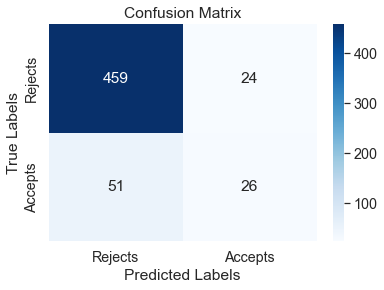

18/18 [==============================] - 0s 2ms/step


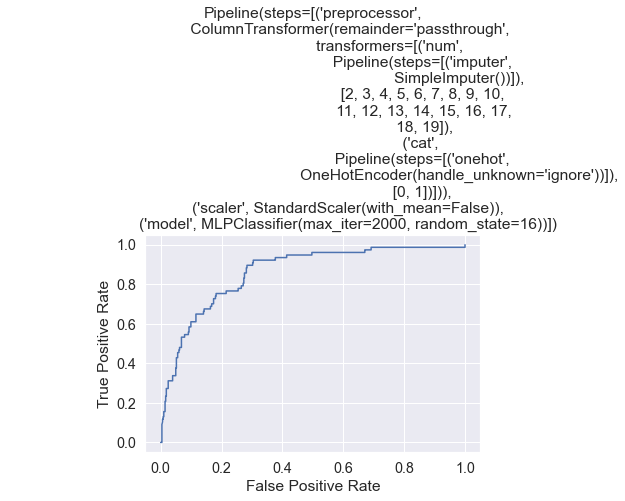

In [22]:
# evaluate the performance of the model on the test set
y_pred = grid_result.predict(X_test)
train_accuracy = grid_result.score(X_train, y_train)
test_accuracy = grid_result.score(X_test, y_test)
print(str(pipe) + '\nTrain accuracy: ' + str(train_accuracy) + '\nTest accuracy: ' + str(test_accuracy))

# generate a confusion matrix and classification report
class_names = ["Rejects", "Accepts"]
cm = confusion_matrix(y_test, y_pred,labels= [0, 1])

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)

# add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# display the plot
plt.show()

# generate an ROC curve
y_prob = grid_result.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(str(pipe))
plt.show()

The effect of adding additional layers to the keras model was investigated to try to increase performance, however this significantly increased runtime and model complexity, and reduced performance, so the original two layers (input and output) were kept.

#### 14) Final evaluation

In [23]:
d = {'Model': ['baseline_keras', 'baseline_sklearn', 'optimised_keras', 'optimised_sklearn'], 
     'Accuracy': [baseline_keras, baseline_sklearn, optimised_keras, optimised_sklearn]}
eval_df = pd.DataFrame(data=d)
eval_df

,Model,Accuracy
0,baseline_keras,0.876786
1,baseline_sklearn,0.858929
2,optimised_keras,0.866071
3,optimised_sklearn,0.883929


Approach: First a base model with the Sklearn MLP neural network classifier was created, then optimized via Gridsearch. This was used as the benchmark to comparatively train a neural network via the Keras library. A baseline model was created and then optimized via Gridsearch leveraging the Keras Wrapper. Model performance was similar between both the optimised sklearn and keras models, however it is recommended to use the optimised keras model going forward as the keras library allows for more model expression. Furthermore, train versus test scores were similar across all models evaluated and so none of the models were deemed to be overfitted.